In [1]:
from fastbook import *

## Plain SGD

```
w -= lr * w.grad
```

## Smoother Gradients: Momentum

```
w.grad_avg = beta * w.grad_avg + (1-beta) * w.grad
w -= lr * w.grad_avg
```

### Exponential Smoothing

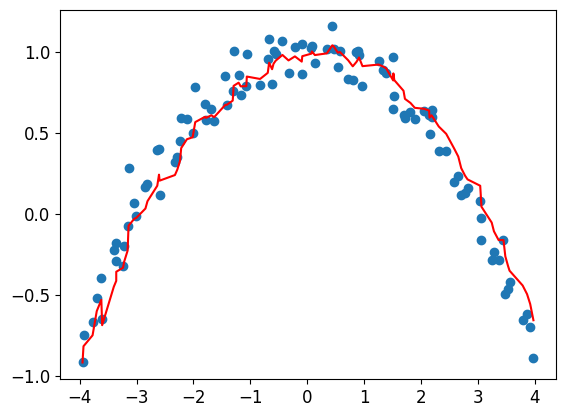

In [2]:
x = np.linspace(-4, 4, 100)
y = 1 - (x/3) ** 2
x1 = x + np.random.randn(100) * 0.1
y1 = y + np.random.randn(100) * 0.1
plt.scatter(x1,y1)
idx = x1.argsort()
beta,avg,res = 0.7,0,[]
for i in idx:
    avg = beta * avg + (1-beta) * y1[i]
    res.append(avg/(1-beta**(i+1)))
plt.plot(x1[idx],np.array(res), color='red');

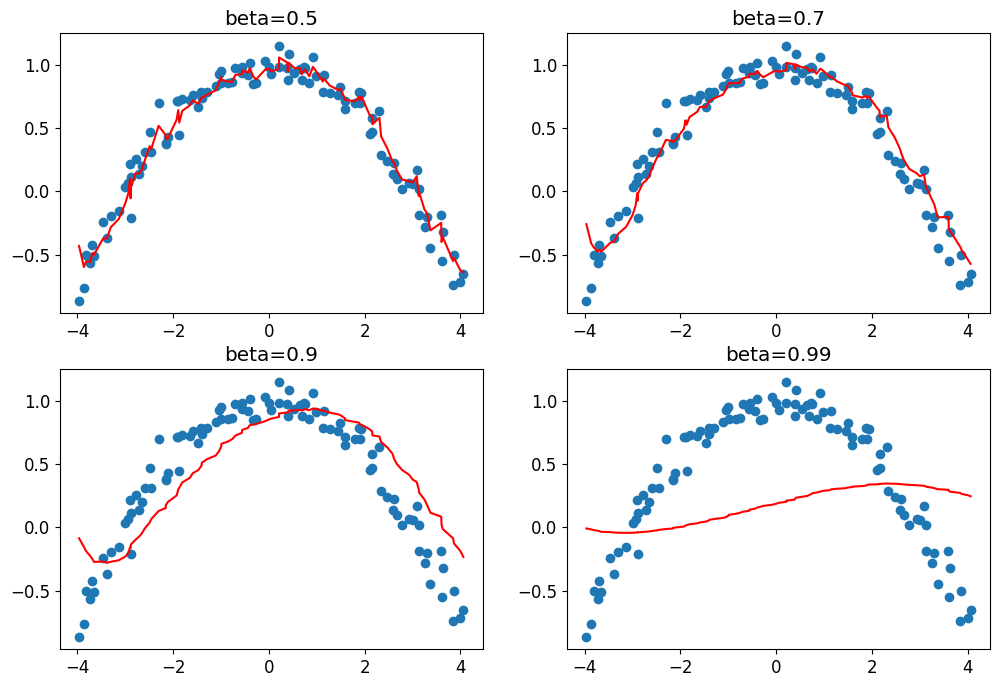

In [3]:
x = np.linspace(-4, 4, 100)
y = 1 - (x/3) ** 2
x1 = x + np.random.randn(100) * 0.1
y1 = y + np.random.randn(100) * 0.1
_,axs = plt.subplots(2,2, figsize=(12,8))
betas = [0.5,0.7,0.9,0.99]
idx = x1.argsort()
for beta,ax in zip(betas, axs.flatten()):
    ax.scatter(x1,y1)
    avg,res = 0,[]
    for i in idx:
        avg = beta * avg + (1-beta) * y1[i]
        res.append(avg)#/(1-beta**(i+1)))
    ax.plot(x1[idx],np.array(res), color='red');
    ax.set_title(f'beta={beta}')

## Adaptive Scaling: RMSProp

```
w.square_grad_avg = alpha * w.square_grad_avg + (1-alpha) * (w.grad ** 2)
w -= lr * w.grad / math.sqrt(w.square_grad_avg + eps)
```

## Combine Both: Adam

```
w.grad_avg = beta * w.grad_avg + (1-beta) * w.grad
unbiasd_grad_avg = w.grad_avg / (1 - (beta**(i+1)))
w.sqr_grad_avg = alpha * w.sqr_grad_avg + (1-alpha) * (w.grad ** 2)
w -= (lr * unbiasd_grad_avg) / sqrt(w.sqr_grad_avg + eps)
```